<a href="https://colab.research.google.com/github/Steven-Macas/Zalando-Red_Neuronal/blob/main/Zalando_Red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# https://www.kaggle.com/datasets/zalando-research/fashionmnist
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
display(np.unique(train_labels))
display(np.unique(test_labels))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

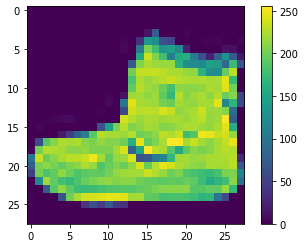

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

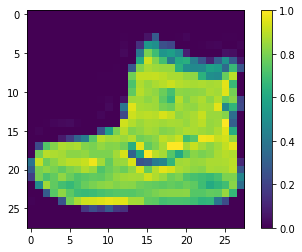

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

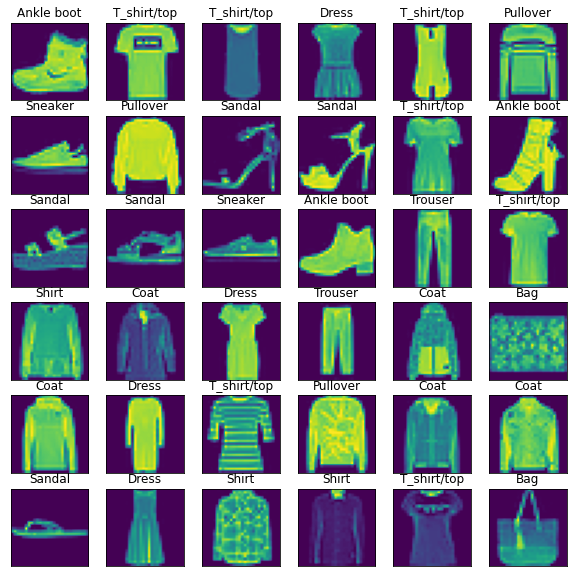

In [10]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape((28,28)))
    label_index = int(train_labels[i])
    plt.title(class_names[label_index])
plt.show()

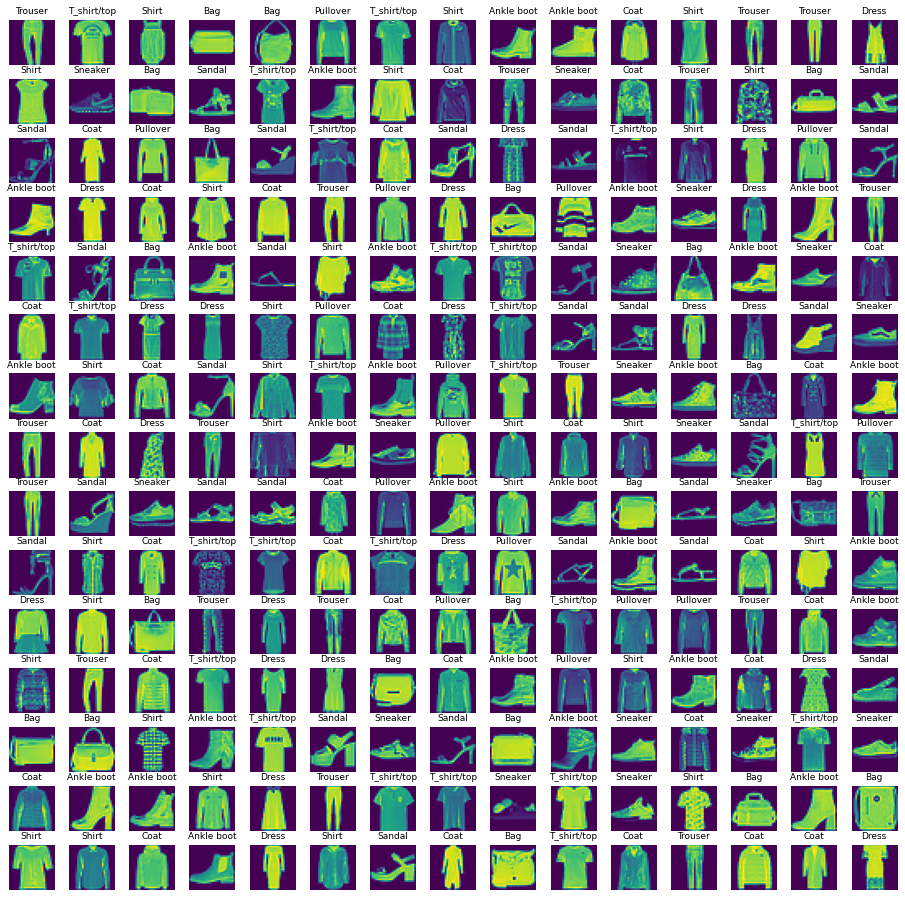

In [11]:
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize = (16,16))
axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array
n_train = len(train_images) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow( train_images[index].reshape((28,28)) )
    labelindex = int(train_labels[index])
    axes[i].set_title(class_names[labelindex], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.3)

# **Red Neuronal**

---



In [14]:
# Defino el modelo de la red neuronal
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # Capa de entrada
    keras.layers.Dense(128, activation='relu'), # Capa oculta con 128 neuronas
    keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas, una por cada clase
])

In [15]:
# Compilo el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
# Entreno el modelo
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3330 - accuracy: 0.8788
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3106 - accuracy: 0.8867
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2924 - accuracy: 0.8913
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2818 - accuracy: 0.8952
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2683 - accuracy: 0.9004
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2582 - accuracy: 0.9052
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2478 - accuracy: 0.9069
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2401 - accuracy: 0.9104
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2301 - accuracy: 0.9145
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.225

In [18]:
# Evalúo el modelo
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.3458 - accuracy: 0.8853
Test accuracy: 0.8852999806404114


In [19]:
# Hago predicciones con el modelo
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


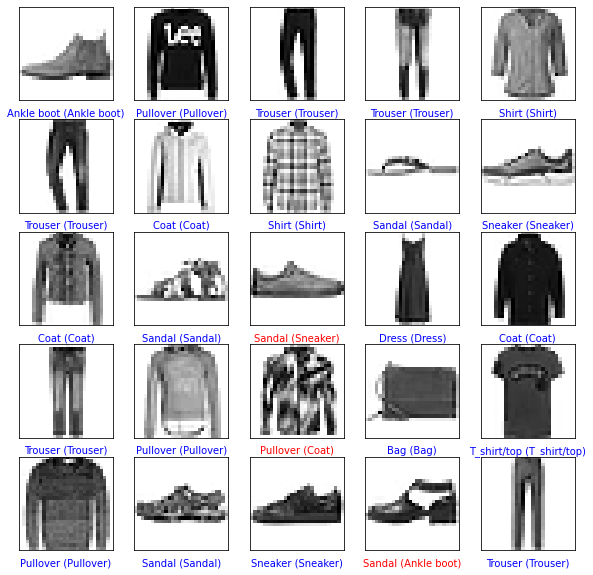

In [20]:
# Muestro las primeras 25 predicciones y las etiquetas reales correspondientes
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                class_names[true_label]), color=color)
plt.show()

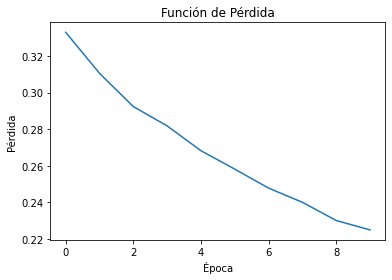

In [21]:
# Graficar la evolución de la función de pérdida
plt.plot(history.history['loss'])
plt.title('Función de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.show()

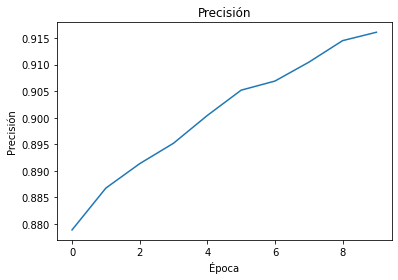

In [22]:
# Graficar la evolución de la métrica de evaluación (en este caso, precisión)
plt.plot(history.history['accuracy'])
plt.title('Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.show()

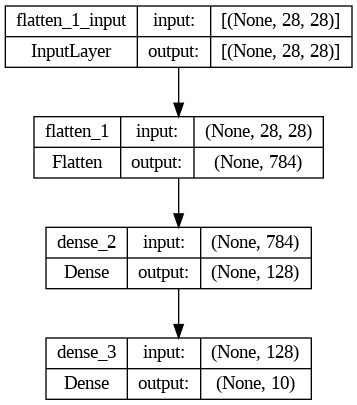

In [23]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

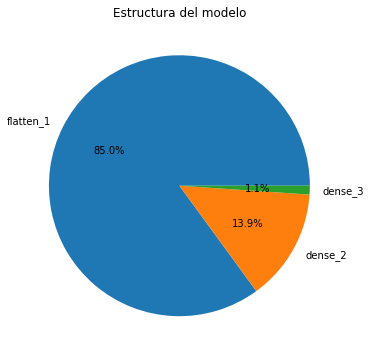

In [24]:
import matplotlib.pyplot as plt

# Obtener la estructura del modelo
model_layers = [layer.output for layer in model.layers]
layer_names = [layer.name for layer in model.layers]

# Crear el diagrama
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title('Estructura del modelo')
ax.axis('off')
_ = plt.pie([layer.shape[-1] for layer in model_layers], labels=layer_names, autopct='%1.1f%%')
plt.show()